In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
#from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

# Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


# Original Classes without Blanced

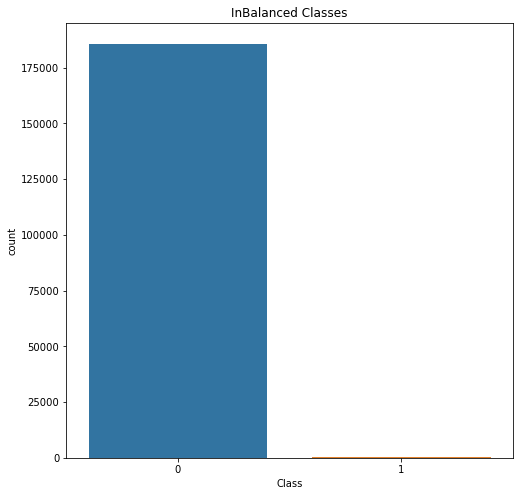

In [4]:
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=data)
plt.title('InBalanced Classes')
plt.show()

## Pre-processing

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,51435.0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,78049.0,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,157168.0,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,69297.0,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,144504.0,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


In [6]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.197490,-0.352125,-0.135904,0.222100,0.231128,1.086617,-0.420363,0.391464,0.672499,-0.058119,...,-0.337999,-0.963921,-0.121931,-1.723430,0.368319,0.408003,-0.031160,-0.013680,39.95,0
1,0.976047,-0.289947,1.465321,1.300002,-1.382887,-0.479586,-0.632572,0.064533,0.710743,-0.093670,...,0.322829,0.790185,-0.101364,0.730461,0.286601,-0.283233,0.059639,0.061220,92.98,0
2,-1.395302,0.478266,-0.584911,-1.201527,0.928544,-0.743618,0.755504,-0.141397,-2.118499,0.182768,...,0.282803,0.903183,-0.444694,0.696438,1.153480,0.311671,-0.662353,-0.161005,29.57,0
3,1.276014,-0.672705,-0.425494,-0.777398,-0.582088,-0.880396,-0.103505,-0.203036,-1.241653,0.849479,...,0.256003,0.408211,-0.274815,0.028707,0.743485,-0.087089,-0.054869,-0.000007,92.68,0
4,-0.312745,-1.202565,2.249806,-0.297210,-0.963389,1.207532,-0.837776,-0.057654,1.121421,0.744263,...,-0.274386,0.682305,0.432717,0.722364,-1.394148,0.660007,-0.221374,-0.136090,40.00,0


In [7]:
shuffled_df = data.sample(frac=1,random_state=4)

In [8]:
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

In [9]:
data = pd.concat([fraud_df, non_fraud_df])

# Classes After Blanced

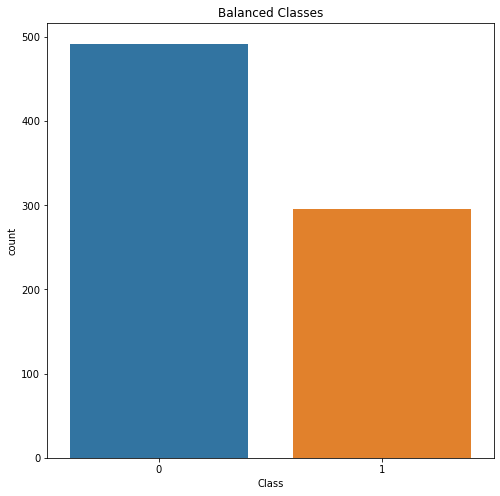

In [10]:
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=data)
plt.title('Balanced Classes')
plt.show()

In [11]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138947,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,-4.533515,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
59256,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
165341,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
179447,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,-3.520128,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1
115004,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,-5.175660,...,1.096405,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,122.68,1


In [12]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [13]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138947,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,-4.533515,...,0.319576,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14
59256,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00
165341,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,...,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00
179447,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,-3.520128,...,1.141615,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00
115004,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,-5.175660,...,0.114760,1.096405,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,122.68


In [14]:
y.head()

,Class
138947,1
59256,1
165341,1
179447,1
115004,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [16]:
X_train.shape

(550, 29)

In [17]:
X_test.shape

(237, 29)

# SVM

In [18]:
from sklearn import svm

In [19]:
support = svm.LinearSVC(random_state=20)

In [20]:
support.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [21]:
y_pred = support.predict(X_test)

In [22]:
model1=metrics.accuracy_score(y_test,y_pred)
print(model1)

0.9240506329113924


In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [24]:
#ig, ax = plot_confusion_matrix(conf_mat=cnf_matrix)
#plt.show()

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier 

In [26]:
tree = DecisionTreeClassifier() 

In [27]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
y_pred = tree.predict(X_test)

In [29]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

0.9240506329113924


In [30]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [31]:
#ig, ax = plot_confusion_matrix(conf_mat=cnf_matrix)
#plt.show()

# AdaBoost (Adaptive Boosting)

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
boost = AdaBoostClassifier(n_estimators=100, base_estimator=tree,learning_rate=1)

In [34]:
boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [35]:
y_pred = boost.predict(X_test)

In [36]:
model3=metrics.accuracy_score(y_test,y_pred)
print(model3)

0.9156118143459916


In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [38]:
#ig, ax = plot_confusion_matrix(conf_mat=cnf_matrix)
#plt.show()

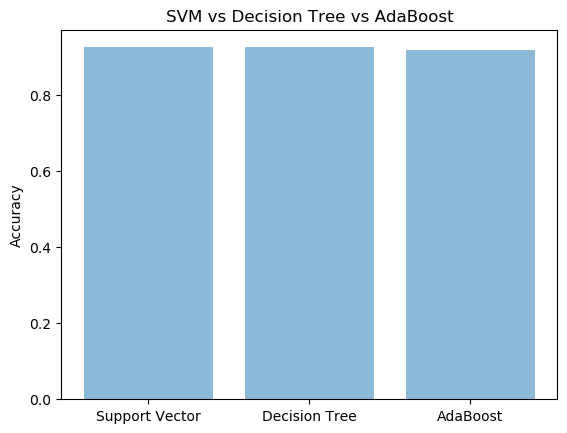

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Support Vector','Decision Tree' ,'AdaBoost')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs Decision Tree vs AdaBoost')

plt.show()

# 1. Univariate Selection

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
df = data.abs()
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138947,0.848290,2.719882,6.199070,3.044437,3.301910,1.992117,3.734902,1.520079,2.548788,4.533515,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,0.171397,127.14,1.0
59256,26.457745,16.497472,30.177317,8.904157,17.892600,1.227904,31.197329,11.438920,9.462573,22.187089,...,8.755698,3.460893,0.896538,0.254836,0.738097,0.966564,7.263482,1.324884,1.00,1.0
165341,5.976119,7.196980,5.388316,5.104799,4.676533,5.566870,4.291180,0.876531,1.075478,3.272569,...,1.459369,0.136262,0.848177,0.269916,1.095060,0.710905,0.565846,1.034107,296.00,1.0
179447,0.232512,0.938944,4.647780,3.079844,1.902655,1.041408,1.020407,0.547069,1.105990,3.520128,...,0.911373,1.042929,0.999394,0.901260,0.452093,0.192959,0.180859,0.029315,345.00,1.0
115004,1.541678,3.846800,7.604114,3.121459,1.254924,2.084875,2.385027,1.471140,2.530507,5.175660,...,1.096405,1.064222,0.065370,0.257209,0.693654,0.335702,0.577052,0.398348,122.68,1.0


In [42]:
X1=df.iloc[:,data.columns!='Class']
y1=df.iloc[:,data.columns=='Class']

In [43]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [44]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
28,Amount,3447.803210
16,V17,2797.374970
13,V14,2516.587152
11,V12,2111.828291
9,V10,1905.066172
2,V3,1884.317715
6,V7,1745.035086
15,V16,1269.025966
3,V4,933.218466
0,V1,869.825460


In [45]:
df1=df[['V17','V14','V12','V10','V3','V7','V16','V4','V1','V11']]
df1.head(1)

,V17,V14,V12,V10,V3,V7,V16,V4,V1,V11
138947,8.71392,4.287996,5.267205,4.533515,6.19907,3.734902,6.469187,3.044437,0.84829,2.288022


[0.00844038 0.06960915 0.02225137 0.10250012 0.00857429 0.00533681
 0.01284791 0.00747204 0.00641648 0.04679841 0.086043   0.05458253
 0.00618528 0.2589049  0.00745789 0.02484639 0.11246527 0.03425001
 0.01148778 0.01039644 0.03977282 0.00667977 0.00827901 0.00616072
 0.00373026 0.00746226 0.01002724 0.00617798 0.0148435 ]


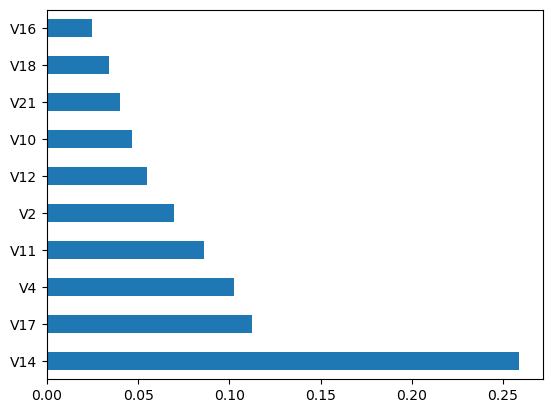

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

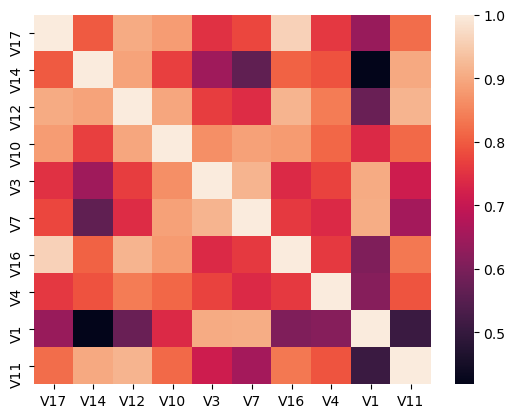

In [47]:
corr = df1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# SVM

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [51]:
cv_r2_scores_rf = cross_val_score(support, X, y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.72949837 0.54014724 0.80992736 0.80992736 0.75562089]
Mean 5-Fold R Squared: 0.7290242445206127
